Description:



Data cleaning is the process of fixing or removing incorrect, corrupted, duplicate, or incomplete
data within a dataset. Messy data leads to unreliable outcomes. Cleaning data is an essential
part of data analysis, and demonstrating your data cleaning skills is key to landing a job. Here
are some projects to test out your data cleaning skills:

Key Concepts and Challenges:

Data Integrity: Ensuring the accuracy, consistency, and reliability of data throughout the
cleaning process.
Missing Data Handling: Dealing with missing values by either imputing them or making
informed decisions on how to handle gaps in the dataset.
Duplicate Removal: Identifying and eliminating duplicate records to maintain data
uniqueness.
Standardization: Consistent formatting and units across the dataset for accurate analysis.
Outlier Detection: Identifying and addressing outliers that may skew analysis or model
performance.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

In [3]:
df=pd.read_csv('/content/AB_NYC_2019.csv')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36334 entries, 0 to 36333
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36334 non-null  int64  
 1   name                            36318 non-null  object 
 2   host_id                         36334 non-null  int64  
 3   host_name                       36313 non-null  object 
 4   neighbourhood_group             36333 non-null  object 
 5   neighbourhood                   36333 non-null  object 
 6   latitude                        36333 non-null  float64
 7   longitude                       36333 non-null  float64
 8   room_type                       36333 non-null  object 
 9   price                           36333 non-null  float64
 10  minimum_nights                  36333 non-null  float64
 11  number_of_reviews               36333 non-null  float64
 12  last_review                     

In [6]:
df.shape

(36334, 16)

In [7]:
df.isnull().sum()

id                                   0
name                                16
host_id                              0
host_name                           21
neighbourhood_group                  1
neighbourhood                        1
latitude                             1
longitude                            1
room_type                            1
price                                1
minimum_nights                       1
number_of_reviews                    1
last_review                       5802
reviews_per_month                 5802
calculated_host_listings_count       1
availability_365                     1
dtype: int64

In [8]:
#checking percent of missing data

In [9]:
(df.isnull().sum()/len(df))*100

id                                 0.000000
name                               0.044036
host_id                            0.000000
host_name                          0.057797
neighbourhood_group                0.002752
neighbourhood                      0.002752
latitude                           0.002752
longitude                          0.002752
room_type                          0.002752
price                              0.002752
minimum_nights                     0.002752
number_of_reviews                  0.002752
last_review                       15.968514
reviews_per_month                 15.968514
calculated_host_listings_count     0.002752
availability_365                   0.002752
dtype: float64

In [10]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.633400e+04,3.633400e+04,36333.000000,36333.000000,36333.000000,36333.000000,36333.000000,30532.000000,36333.000000,36333.000000
mean,1.422079e+07,4.471385e+07,40.728640,-73.953169,147.358022,6.905651,29.448793,1.142241,3.941761,101.593427
std,8.427656e+06,5.381382e+07,0.054364,0.044079,230.736064,21.098663,49.930208,1.480552,13.425832,129.733033
min,2.539000e+03,2.438000e+03,40.499790,-74.242850,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,6.967039e+06,5.905590e+06,40.689100,-73.982400,69.000000,2.000000,1.000000,0.140000,1.000000,0.000000
50%,1.421927e+07,2.213123e+07,40.722280,-73.955970,105.000000,3.000000,8.000000,0.490000,1.000000,18.000000
75%,2.152909e+07,6.139196e+07,40.763490,-73.938240,170.000000,5.000000,35.000000,1.660000,2.000000,201.000000
max,2.891183e+07,2.179093e+08,40.911690,-73.712990,10000.000000,1250.000000,629.000000,19.750000,232.000000,365.000000


In [11]:
#(.T) is used to transpose the data i.e converting rows to columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,36334.0,1.422079e+07,8.427656e+06,2539.00000,6.967039e+06,1.421927e+07,2.152909e+07,2.891183e+07
host_id,36334.0,4.471385e+07,5.381382e+07,2438.00000,5.905590e+06,2.213123e+07,6.139196e+07,2.179093e+08
latitude,36333.0,4.072864e+01,5.436450e-02,40.49979,4.068910e+01,4.072228e+01,4.076349e+01,4.091169e+01
longitude,36333.0,-7.395317e+01,4.407927e-02,-74.24285,-7.398240e+01,-7.395597e+01,-7.393824e+01,-7.371299e+01
price,36333.0,1.473580e+02,2.307361e+02,0.00000,6.900000e+01,1.050000e+02,1.700000e+02,1.000000e+04
minimum_nights,36333.0,6.905651e+00,2.109866e+01,1.00000,2.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,36333.0,2.944879e+01,4.993021e+01,0.00000,1.000000e+00,8.000000e+00,3.500000e+01,6.290000e+02
reviews_per_month,30532.0,1.142241e+00,1.480552e+00,0.01000,1.400000e-01,4.900000e-01,1.660000e+00,1.975000e+01
calculated_host_listings_count,36333.0,3.941761e+00,1.342583e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,2.320000e+02
availability_365,36333.0,1.015934e+02,1.297330e+02,0.00000,0.000000e+00,1.800000e+01,2.010000e+02,3.650000e+02


In [12]:
#replacing null values with desired values

In [13]:
df['name'].replace(np.nan,'Other Hotels',inplace=True)

In [14]:
df['host_name'].replace(np.nan,'Other',inplace=True)

In [15]:
df['reviews_per_month'].replace(np.nan,0,inplace=True)

In [16]:
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  1
neighbourhood                        1
latitude                             1
longitude                            1
room_type                            1
price                                1
minimum_nights                       1
number_of_reviews                    1
last_review                       5802
reviews_per_month                    0
calculated_host_listings_count       1
availability_365                     1
dtype: int64

In [17]:
#dropping non-required columns
df.drop(['id','name','last_review'],axis=1,inplace=True)

In [18]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,6.0,365.0
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,0.38,2.0,355.0
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,0.00,1.0,365.0
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,4.64,1.0,194.0
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,0.10,1.0,0.0


In [19]:
df.shape

(36334, 13)

In [20]:
df.isnull().sum()

host_id                           0
host_name                         0
neighbourhood_group               1
neighbourhood                     1
latitude                          1
longitude                         1
room_type                         1
price                             1
minimum_nights                    1
number_of_reviews                 1
reviews_per_month                 0
calculated_host_listings_count    1
availability_365                  1
dtype: int64

In [21]:
#lets check out top 10 host name

In [22]:
df['host_name'].value_counts().iloc[:10]

host_name
Michael    328
David      295
John       233
Sarah      202
Alex       188
Daniel     178
Mike       156
Jessica    156
Chris      154
Andrew     149
Name: count, dtype: int64

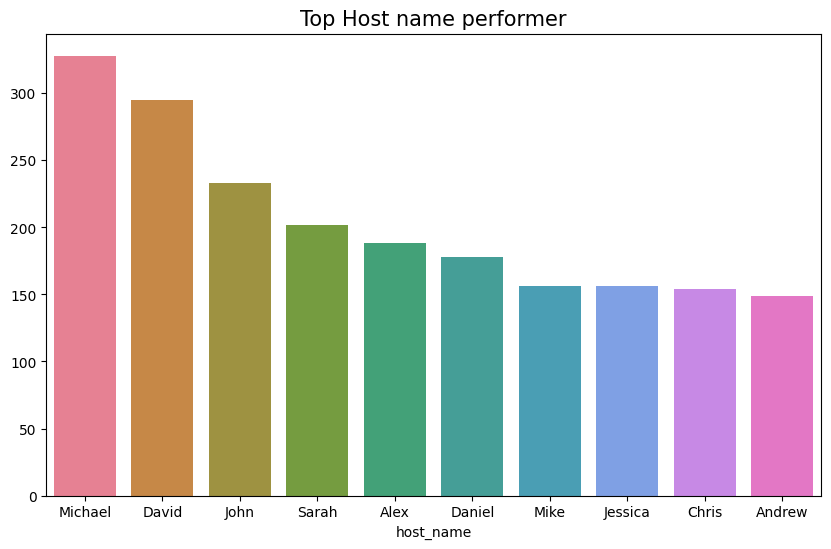

In [23]:
#visualising it using bar plot
plt.figure(figsize=(10,6))
top_10_hosts = df['host_name'].value_counts().iloc[:10] # Get the top 10 hosts and their counts
#sns.barplot(x=top_10_hosts.index, y=top_10_hosts.values,palette='husl') # Use the index (host names) for x and values (counts) for y
sns.barplot(x=top_10_hosts.index, y=top_10_hosts.values, hue=top_10_hosts.index, palette='husl', legend=False)  # Assign the x variable to hue
plt.title("Top Host name performer",fontsize=15)
plt.show()


Observation
1.Host name is the name of the host who listed the hotel in the airbnb. 2.Michael has the maximum bookings under his name.

In [24]:
#neighbourhood group

In [25]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        15928
Brooklyn         15591
Queens            3845
Bronx              704
Staten Island      265
Name: count, dtype: int64

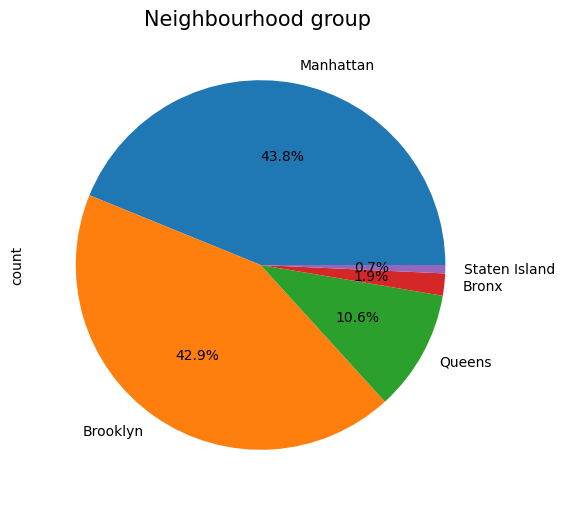

In [26]:
#visualising using pie chart
df['neighbourhood_group'].value_counts().plot(kind='pie',figsize=(6,6),autopct='%1.1f%%',fontsize=10)
plt.title("Neighbourhood group ",fontsize=15)
plt.show()


Observation
1.Manhattan group has highest number of bookings

2.and Brooklyn has tye second highest number of bookings.

In [27]:
#finding the top 10 host_id
#Unique ID for the host who listed the property on airbnb

In [28]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,6.0,365.0
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,0.38,2.0,355.0
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,0.00,1.0,365.0
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,4.64,1.0,194.0
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,0.10,1.0,0.0


In [29]:
df['host_id'].value_counts().reset_index().iloc[:10]

,host_id,count
0,30283594,113
1,12243051,96
2,22541573,83
3,61391963,81
4,16098958,73
5,200380610,54
6,7503643,52
7,1475015,49
8,120762452,48
9,2856748,48


<ipython-input-30-30579964087e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_hosts.keys(), y=top_10_hosts.values, palette='bright') # Pass only top 10 data


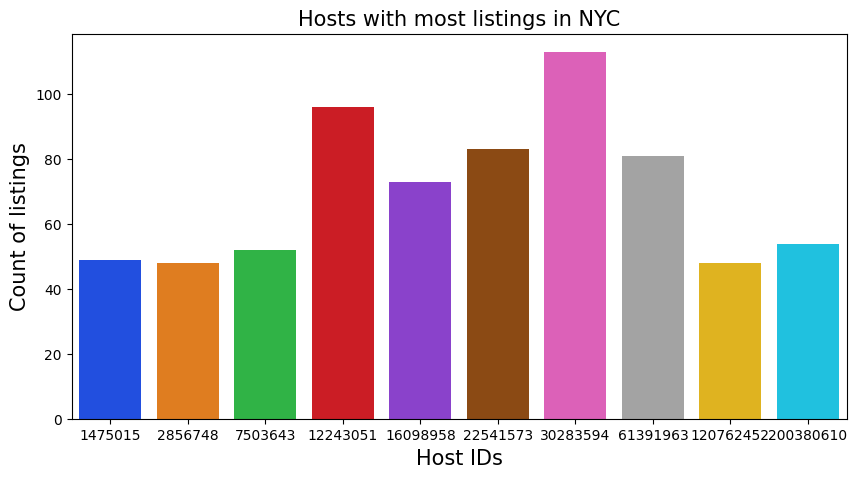

In [30]:
#plotting the bar grapgh for the above info
plt.figure(figsize=(10,5))
top_10_hosts = df['host_id'].value_counts().iloc[:10] # Calculate top 10 hosts first
sns.barplot(x=top_10_hosts.keys(), y=top_10_hosts.values, palette='bright') # Pass only top 10 data
plt.title("Hosts with most listings in NYC",fontsize=15)
plt.xlabel("Host IDs",fontsize=15)
plt.ylabel("Count of listings",fontsize=15)
plt.show()


Observation
1.We can see that there is a good distribution between top 10 hosts

2.First host has more than 300+ listings

In [31]:
#neighbourhood_group according to price

In [32]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,6.0,365.0
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,0.38,2.0,355.0
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,0.00,1.0,365.0
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,4.64,1.0,194.0
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,0.10,1.0,0.0


<Axes: xlabel='price'>

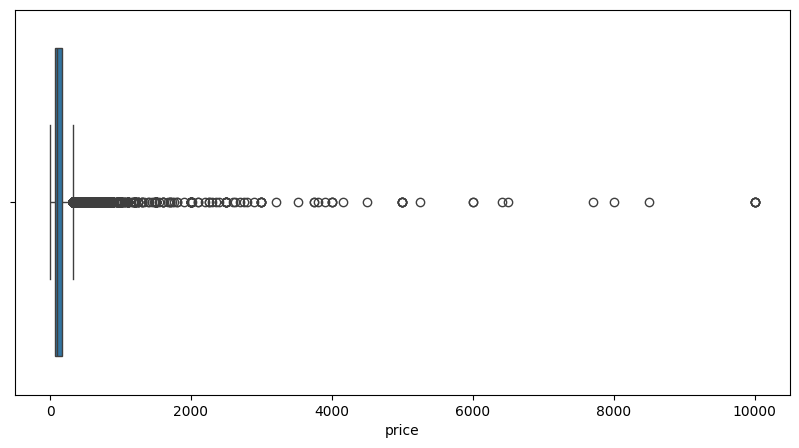

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['price'])

In [34]:
df['price'].describe()

count    36333.000000
mean       147.358022
std        230.736064
min          0.000000
25%         69.000000
50%        105.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64

In [35]:
#Probability density Function graph

<ipython-input-36-7bb5261b12cb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'],color='red',hist_kws={"linewidth":15,'alpha':1})


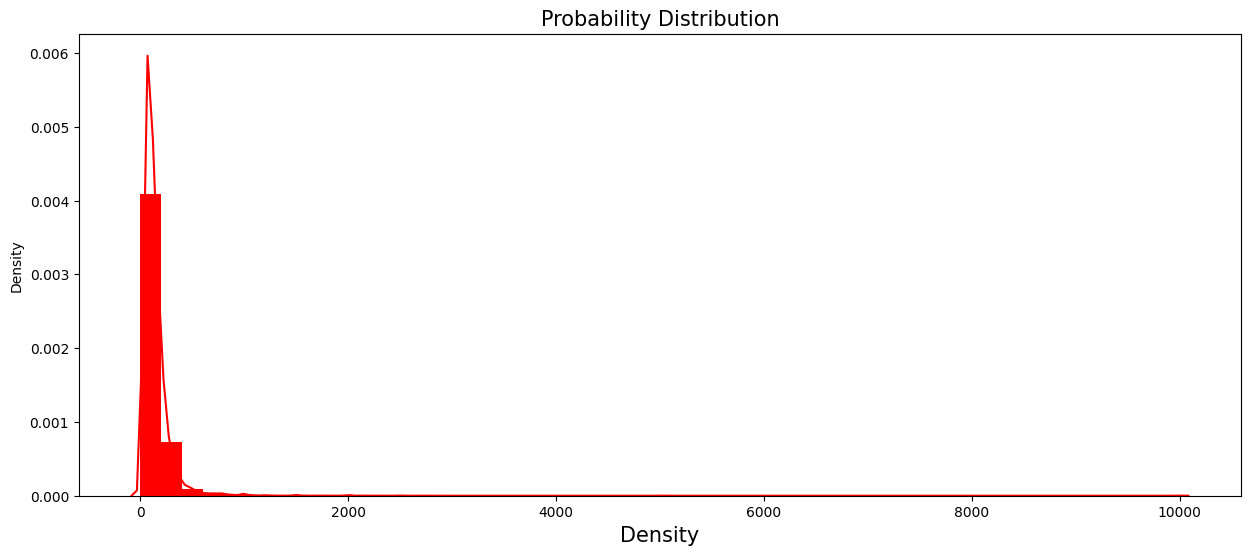

In [36]:
plt.figure(figsize=(15,6))
sns.distplot(df['price'],color='red',hist_kws={"linewidth":15,'alpha':1})
plt.title("Probability Distribution",fontsize=15)
plt.xlabel('Price',fontsize=15)
plt.xlabel('Density',fontsize=15)
plt.show()

In [37]:
#Calculating the interquartile range

In [38]:
# First Quartile
Q1=np.percentile(df['price'],25,interpolation='midpoint')
# Third Quartile
Q3=np.percentile(df['price'],75,interpolation='midpoint')
# Interquartile range(IQR)
IQR=Q3-Q1
print(f"The IQR is {IQR}")
print("The Minimum value is ", (Q3-(1.5*(IQR))))
print("The Maximum value is ", (Q3+(1.5*(IQR))))

The IQR is nan
The Minimum value is  nan
The Maximum value is  nan


We can see that 99% of data lies within 334 dollars with mean 153 and median 106

In [39]:
df_new=df[df['price']<334]
df_new.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,6.0,365.0
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,0.38,2.0,355.0
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,0.00,1.0,365.0
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,4.64,1.0,194.0
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,0.10,1.0,0.0


In [40]:
df_new.groupby(['neighbourhood_group'])['price'].describe().T.reset_index()

neighbourhood_group,index,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,count,689.000000,15089.000000,14617.000000,3783.000000,259.000000
1,mean,76.271408,106.504805,141.413354,88.291832,86.895753
2,std,45.567390,60.501604,67.610807,51.455556,56.808402
3,min,0.000000,0.000000,0.000000,10.000000,20.000000
4,25%,45.000000,60.000000,89.000000,51.000000,49.000000
5,50%,65.000000,90.000000,130.000000,75.000000,72.000000
6,75%,90.000000,140.000000,189.000000,105.000000,104.000000
7,max,325.000000,333.000000,333.000000,325.000000,300.000000


Text(0.5, 1.0, 'Density and distribution of prices for each neighbourhood_group')

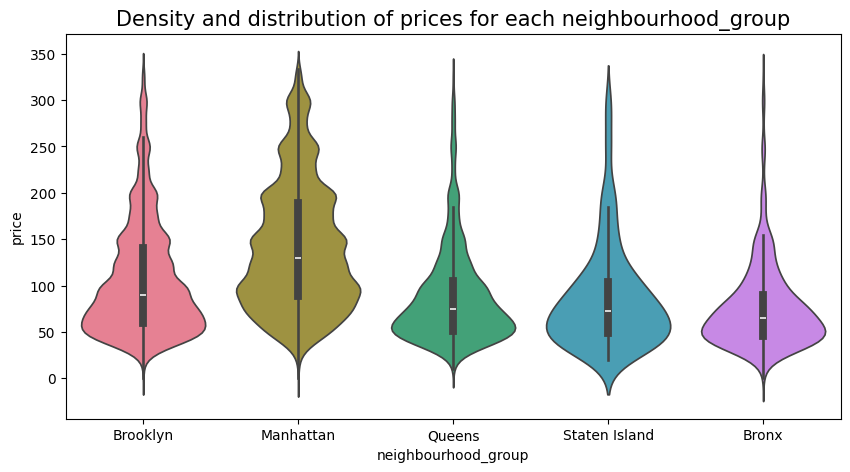

In [41]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df_new, x='neighbourhood_group', y='price', hue='neighbourhood_group', palette='husl', legend=False)
plt.title('Density and distribution of prices for each neighbourhood_group',fontsize=15)

<ipython-input-42-a3f043be57c9>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=n1['price'])
<ipython-input-42-a3f043be57c9>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=n2['price'])
<ipython-input-42-a3f043be57c9>:15: UserWarning: 

`distplot` is a deprecated function and will be remo

Text(0.5, 1.0, 'Bronx')

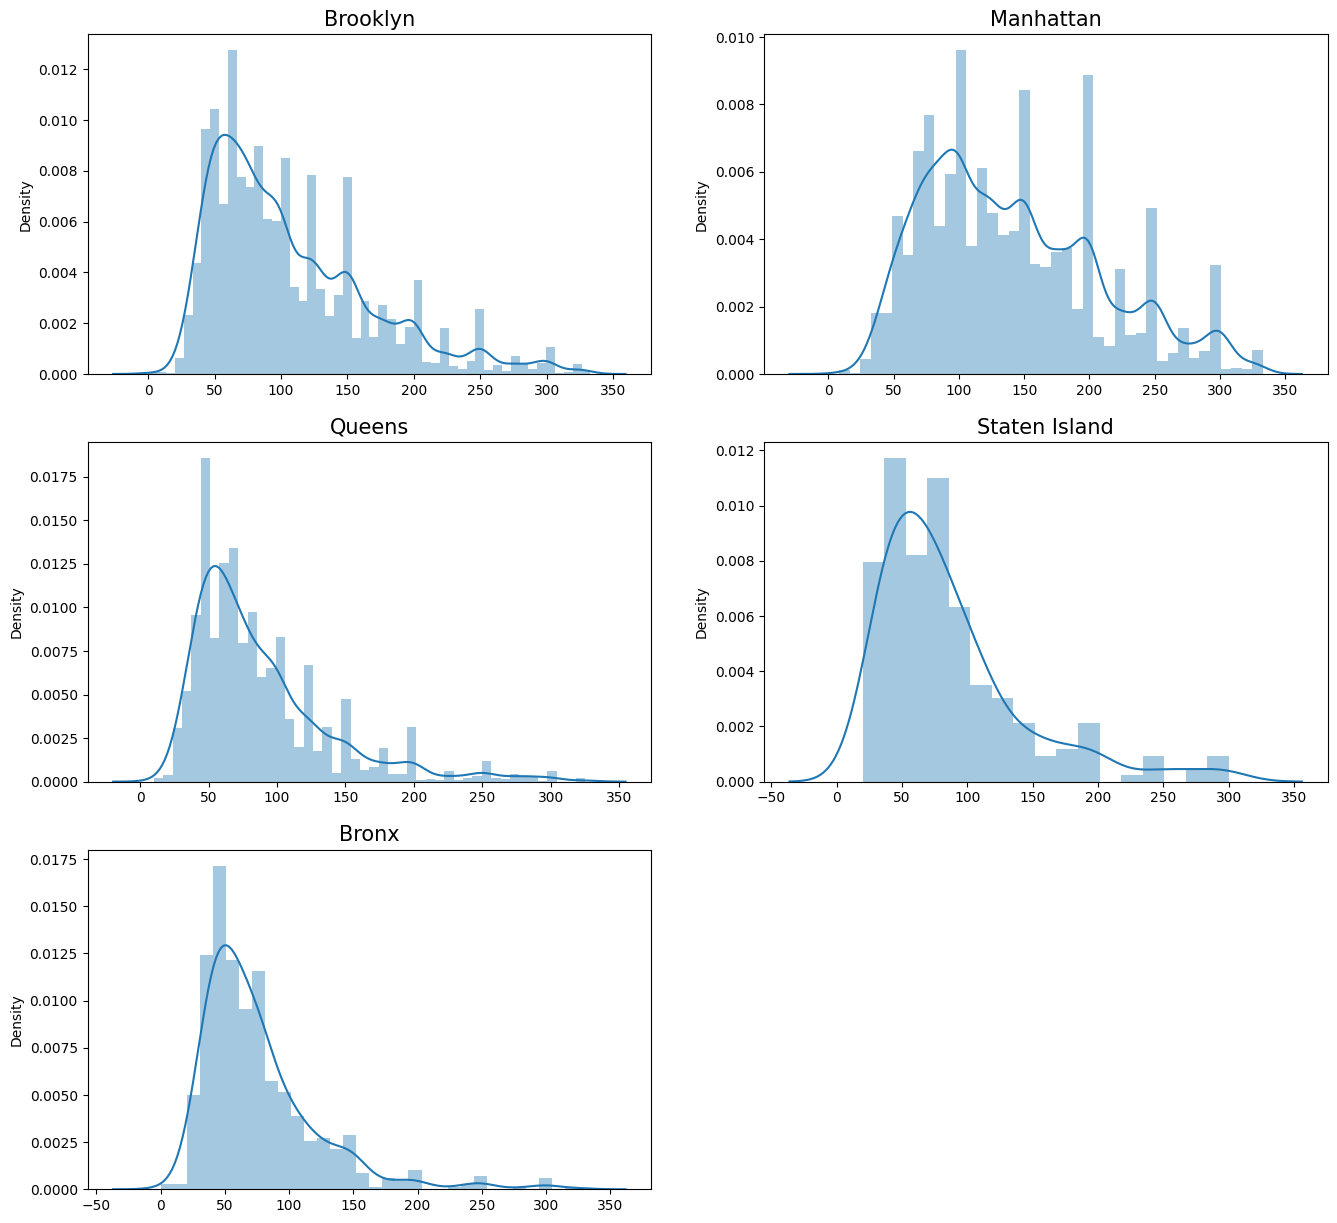

In [42]:
plt.figure(figsize=(16,15))

plt.subplot(3,2,1)
n1=df_new[df_new['neighbourhood_group']=='Brooklyn']
sns.distplot(x=n1['price'])
plt.title("Brooklyn",fontsize=15)

plt.subplot(3,2,2)
n2=df_new[df_new['neighbourhood_group']=='Manhattan']
sns.distplot(x=n2['price'])
plt.title("Manhattan",fontsize=15)

plt.subplot(3,2,3)
n3=df_new[df_new['neighbourhood_group']=='Queens']
sns.distplot(x=n3['price'])
plt.title("Queens",fontsize=15)

plt.subplot(3,2,4)
n4=df_new[df_new['neighbourhood_group']=='Staten Island']
sns.distplot(x=n4['price'])
plt.title("Staten Island",fontsize=15)

plt.subplot(3,2,5)
n5=df_new[df_new['neighbourhood_group']=='Bronx']
sns.distplot(x=n5['price'])
plt.title("Bronx",fontsize=15)

<ipython-input-43-83e8041d06a0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=n5['price'],rug=True,color='r')


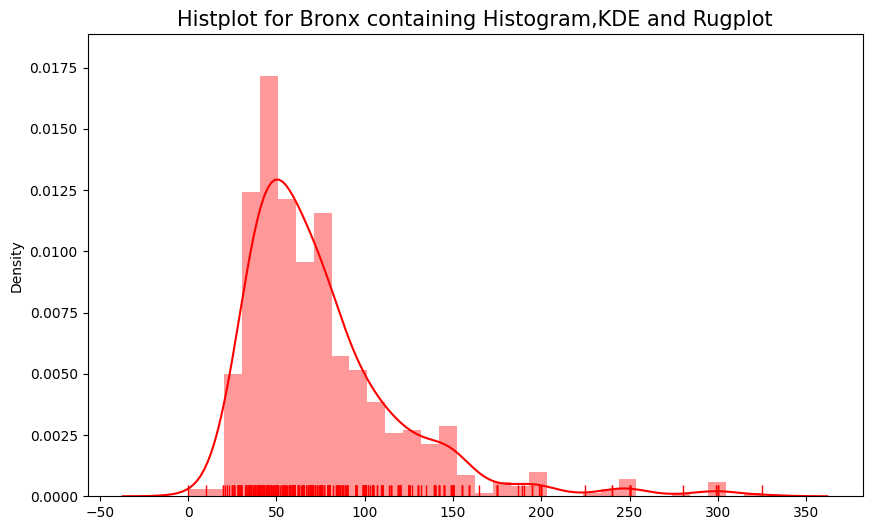

In [43]:
plt.figure(figsize=(10,6))
sns.distplot(x=n5['price'],rug=True,color='r')
plt.title("Histplot for Bronx containing Histogram,KDE and Rugplot",fontsize=15)
plt.show()

Observation
1.Manhattan has the highest range of prices for the listings with 150 price as median observation, followed by Brooklyn with 90 per night

2.Queens and Staten Island appear to have very similar distribution, Bronx is the cheapest of all.

3.This distribution was completely expected as we know Manhattan is one of the most expensive city in the world to live in , on the other hand Bronx appears to be having lower standards of living

In [44]:
#room type

In [45]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,6.0,365.0
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,0.38,2.0,355.0
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,0.00,1.0,365.0
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,4.64,1.0,194.0
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,0.10,1.0,0.0


In [47]:
df['room_type'].value_counts()

room_type
Entire home/apt    19014
Private room       16604
Shared room          715
Name: count, dtype: int64

Text(0.5, 1.0, 'Room type')

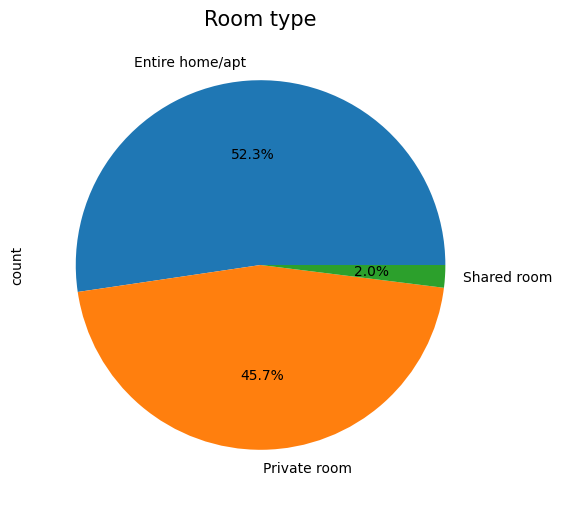

In [50]:
# Visualizing the above data
df['room_type'].value_counts().plot(kind='pie',figsize=(6,6),fontsize=10,autopct='%1.1f%%')
plt.title("Room type",fontsize=15)

Observation
1.Most of the people opt to rent entire home or apt which constitutes 52%

2.Followed by Private rooms wich constitutes approx, 46%

In [51]:
#price for different room type

In [52]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,6.0,365.0
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,0.38,2.0,355.0
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,0.00,1.0,365.0
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,4.64,1.0,194.0
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,0.10,1.0,0.0


In [53]:
df.groupby(['room_type'])['price'].mean().reset_index()

,room_type,price
0,Entire home/apt,202.518933
1,Private room,87.252710
2,Shared room,76.251748


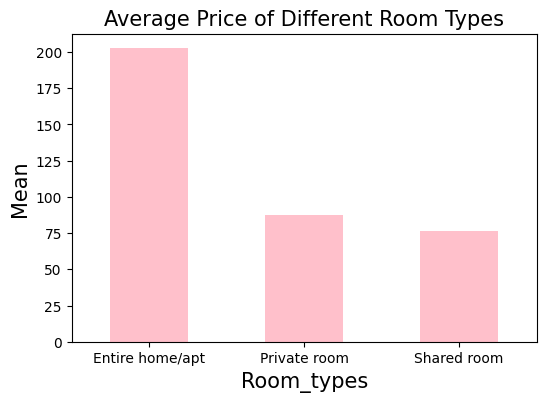

In [58]:
df.groupby(['room_type'])['price'].mean().plot(kind='bar',figsize=(6,4),color='pink')
plt.xticks(rotation=360)
plt.title("Average Price of Different Room Types", fontsize=15)
plt.xlabel('Room_types',fontsize=15)
plt.ylabel('Mean',fontsize=15)
plt.show()

In [59]:
df.groupby(['room_type'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,19014.0,202.518933,273.840070,0.0,116.0,153.0,220.0,10000.0
Private room,16604.0,87.252710,150.797254,0.0,50.0,70.0,95.0,10000.0
Shared room,715.0,76.251748,115.512199,0.0,35.0,50.0,75.0,1800.0


Text(0.5, 1.0, 'Shared Room')

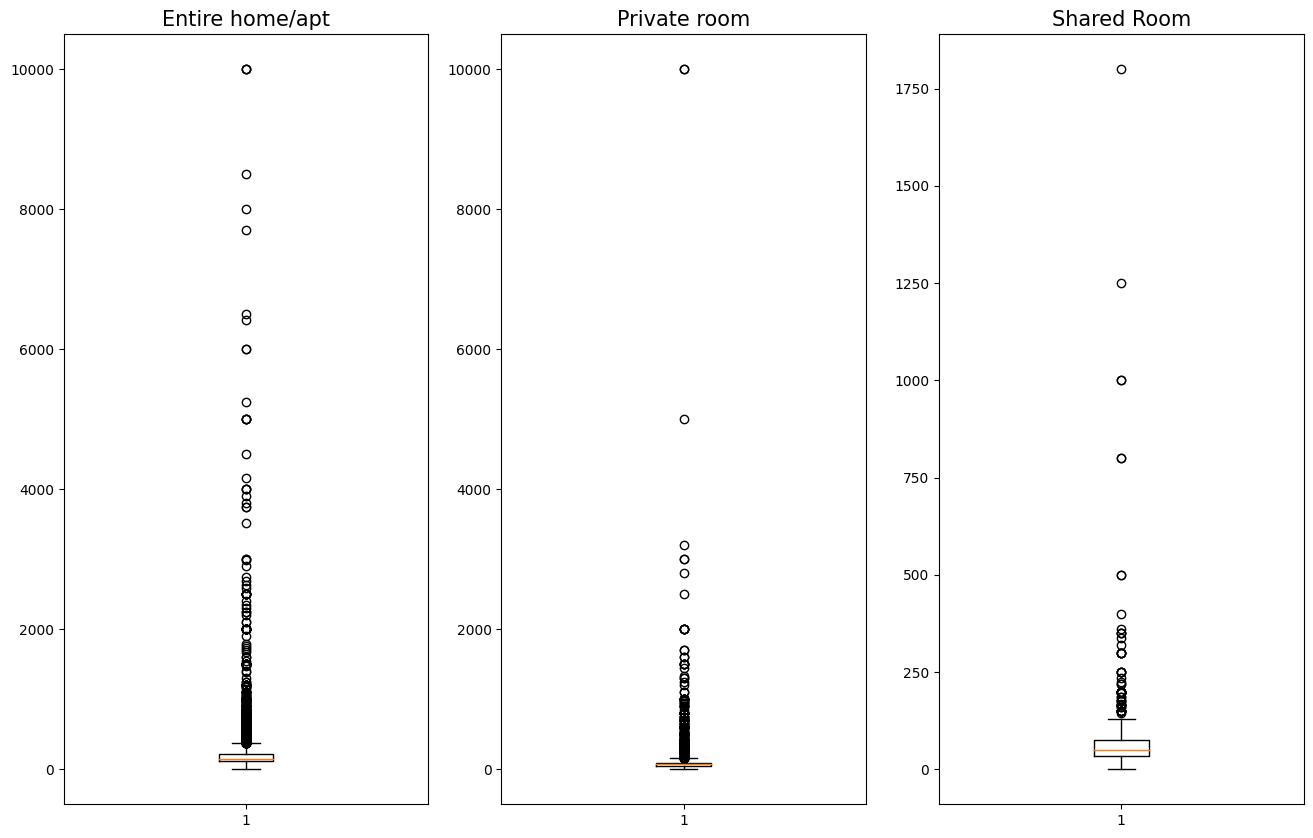

In [60]:
plt.figure(figsize=(16,10))

plt.subplot(1,3,1)
entire=df[df['room_type']=='Entire home/apt']
plt.boxplot(x=entire['price'])
plt.title("Entire home/apt",fontsize=15)

plt.subplot(1,3,2)
private=df[df['room_type']=='Private room']
plt.boxplot(x=private['price'])
plt.title("Private room",fontsize=15)

plt.subplot(1,3,3)
shared=df[df['room_type']=='Shared room']
plt.boxplot(x=shared['price'])
plt.title("Shared Room",fontsize=15)

observation-
1.From Boxplot we can conclude that entire home-apt highest price goes till 10000 dollars, and it has alot of outliers as compared to other two so the average value also goes higher.

2.Private rooms also have the outliers till 10000 dollars but as we can see the average value is approx. 90 dollars.

3.Shared rooms are the least preffere rooms wiith max value of 1800 and avg value around 70 dollars.

In [61]:
#minimum nights for different types of room

In [62]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,6.0,365.0
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,0.38,2.0,355.0
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,0.00,1.0,365.0
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,4.64,1.0,194.0
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,0.10,1.0,0.0


In [63]:
round(df.groupby(['room_type'])['minimum_nights'].mean().reset_index(),0)

,room_type,minimum_nights
0,Entire home/apt,8.0
1,Private room,5.0
2,Shared room,6.0


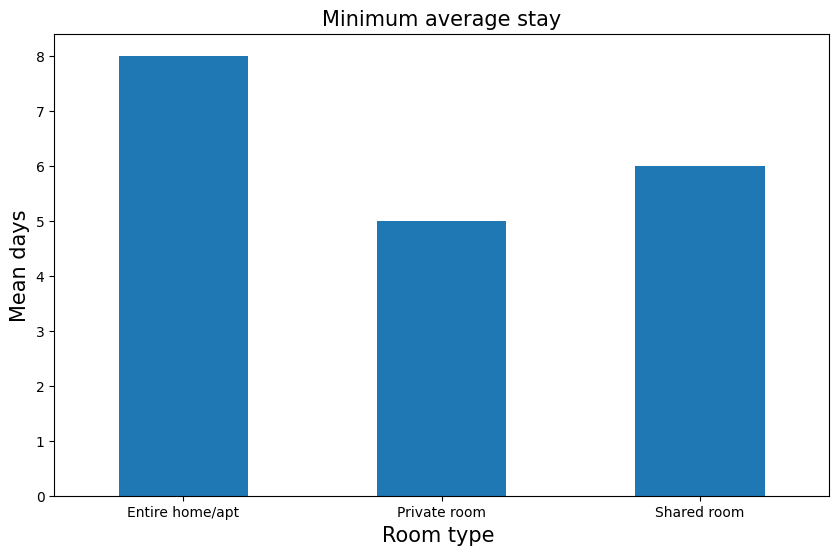

In [64]:
round(df.groupby(['room_type'])['minimum_nights'].mean(),0).plot(kind='bar',figsize=(10,6),fontsize=10) #rounding off to zero as we cant book room for a half day
plt.xticks(rotation=360)
plt.title("Minimum average stay",fontsize=15)
plt.xlabel("Room type ",fontsize=15)
plt.ylabel("Mean days",fontsize=15)
plt.show()

Text(0.5, 1.0, 'Shared Room')

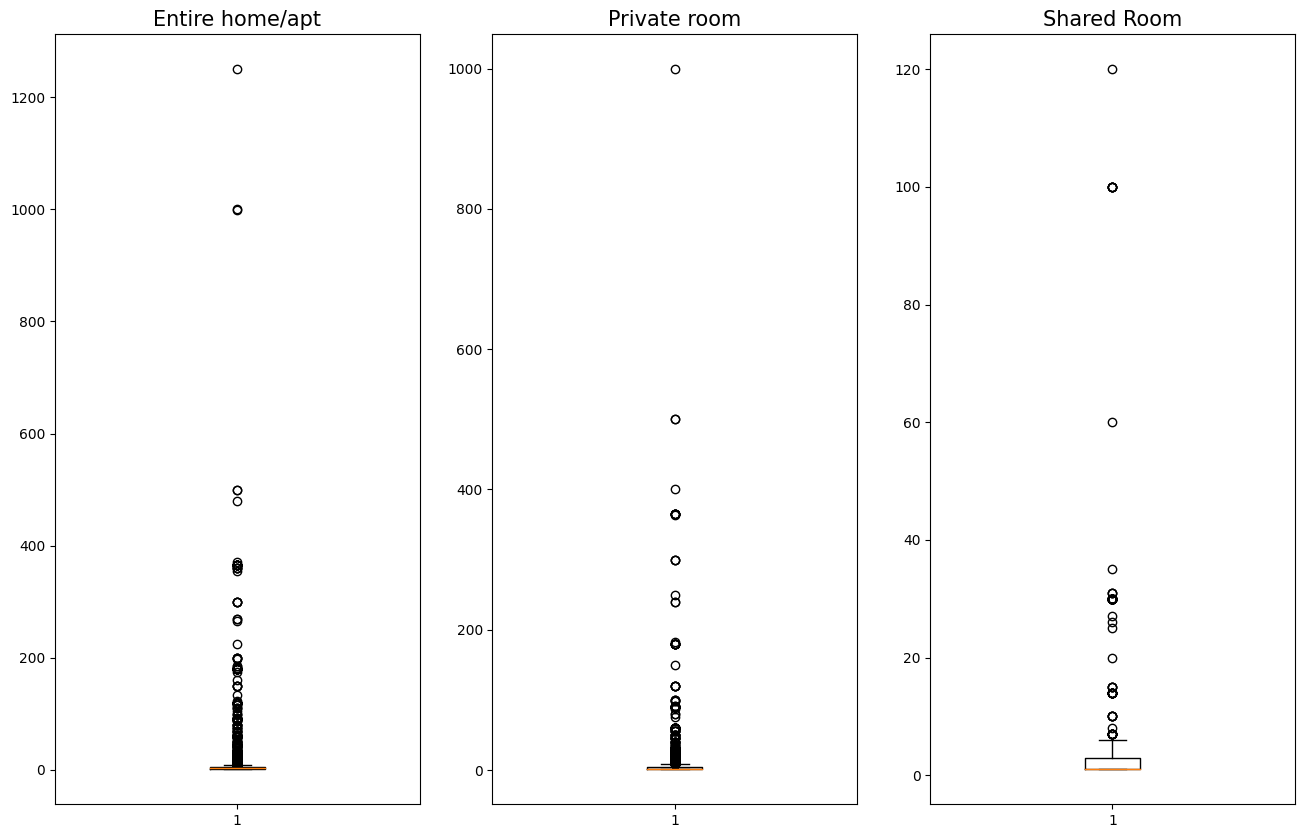

In [65]:
plt.figure(figsize=(16,10))

plt.subplot(1,3,1)
entire=df[df['room_type']=='Entire home/apt']
plt.boxplot(x=entire['minimum_nights'])
plt.title("Entire home/apt",fontsize=15)

plt.subplot(1,3,2)
private=df[df['room_type']=='Private room']
plt.boxplot(x=private['minimum_nights'])
plt.title("Private room",fontsize=15)

plt.subplot(1,3,3)
shared=df[df['room_type']=='Shared room']
plt.boxplot(x=shared['minimum_nights'])
plt.title("Shared Room",fontsize=15)

Observation
1.Minumum days to stay in entire home/apt are 9 though it has the highest price.

2.Minumum days to stay in entire Private room are 5.

3.Minumum days to stay in entire shared room are 6.

In [66]:
#availability

In [68]:
df['availability_365'].value_counts().iloc[:10].sort_index()

availability_365
0.0      15777
1.0        271
2.0        178
3.0        217
5.0        204
89.0       220
90.0       187
179.0      176
364.0      371
365.0      885
Name: count, dtype: int64

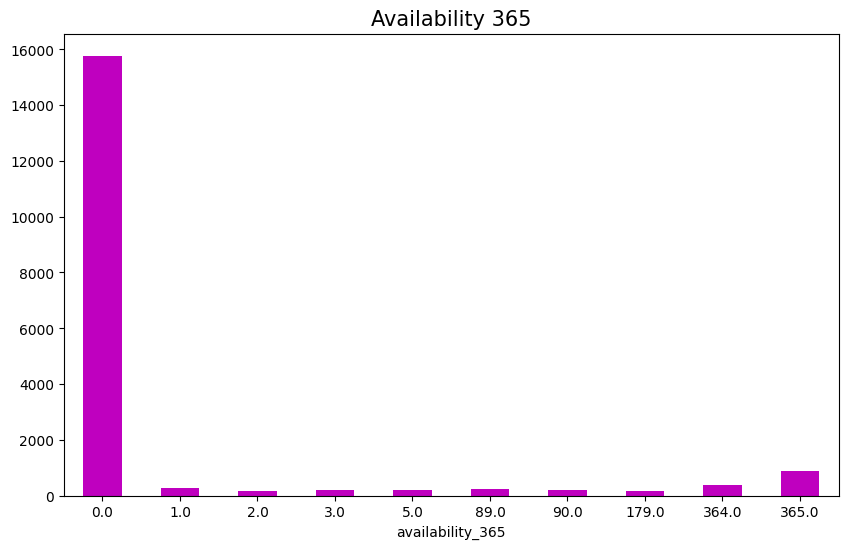

In [69]:
df['availability_365'].value_counts().iloc[:10].sort_index().plot(kind='bar',figsize=(10,6),color='m',fontsize=10)
plt.xticks(rotation=360)
plt.title("Availability 365",fontsize=15)
plt.show()

In [70]:
#Neighbourhood group with respect to room type

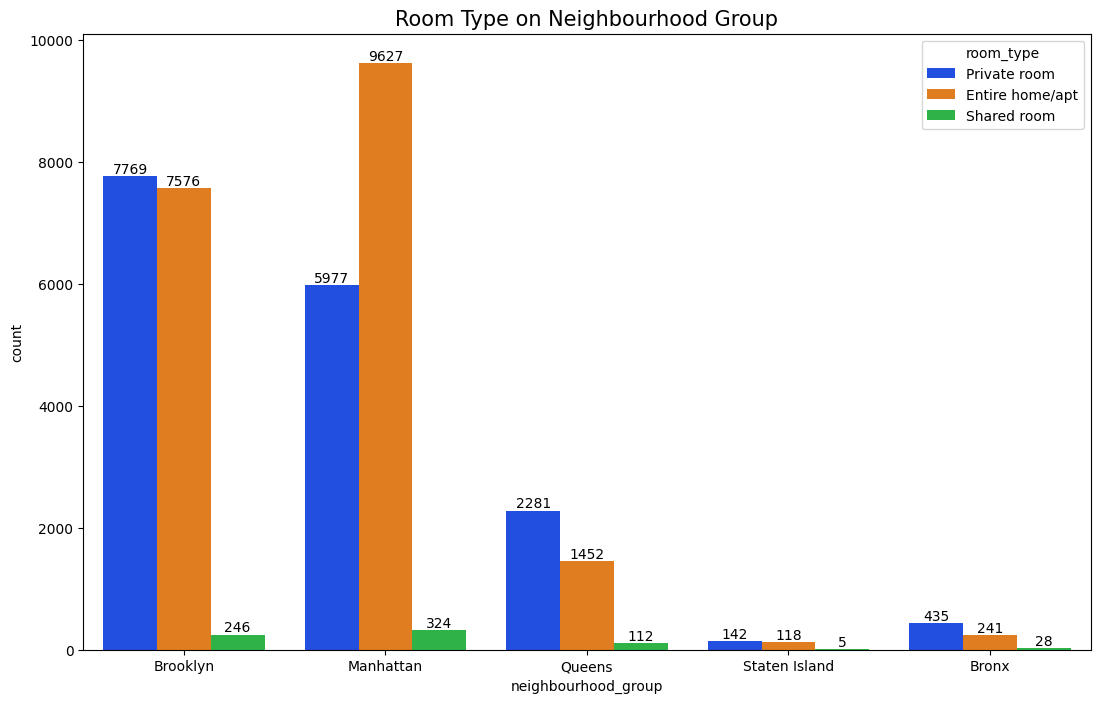

In [71]:
plt.figure(figsize=(13,8))
ax = sns.countplot(x='neighbourhood_group', hue='room_type', data=df, palette="bright")
plt.title("Room Type on Neighbourhood Group",fontsize=15)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.show()


Observation
1.Manhattan has most number of entire home/apt amongst all groups
2.Brooklyn has most private rooms
3.Brooklyn and Manhattan almost same number of shared rooms

In [72]:
#Finding top 10 and bottom 10 of the neighbourhoods

In [73]:
print(df['neighbourhood'].value_counts().iloc[:10],'\n')
print(df['neighbourhood'].value_counts().tail(10))

neighbourhood
Williamsburg          3097
Bedford-Stuyvesant    2759
Harlem                2085
Bushwick              1806
Upper West Side       1564
East Village          1471
Upper East Side       1377
Hell's Kitchen        1284
Crown Heights         1263
Midtown               1023
Name: count, dtype: int64 

neighbourhood
Rossville                     1
New Dorp                      1
Woodrow                       1
Huguenot                      1
West Farms                    1
Fort Wadsworth                1
Todt Hill                     1
Bay Terrace, Staten Island    1
Oakwood                       1
Willowbrook                   1
Name: count, dtype: int64


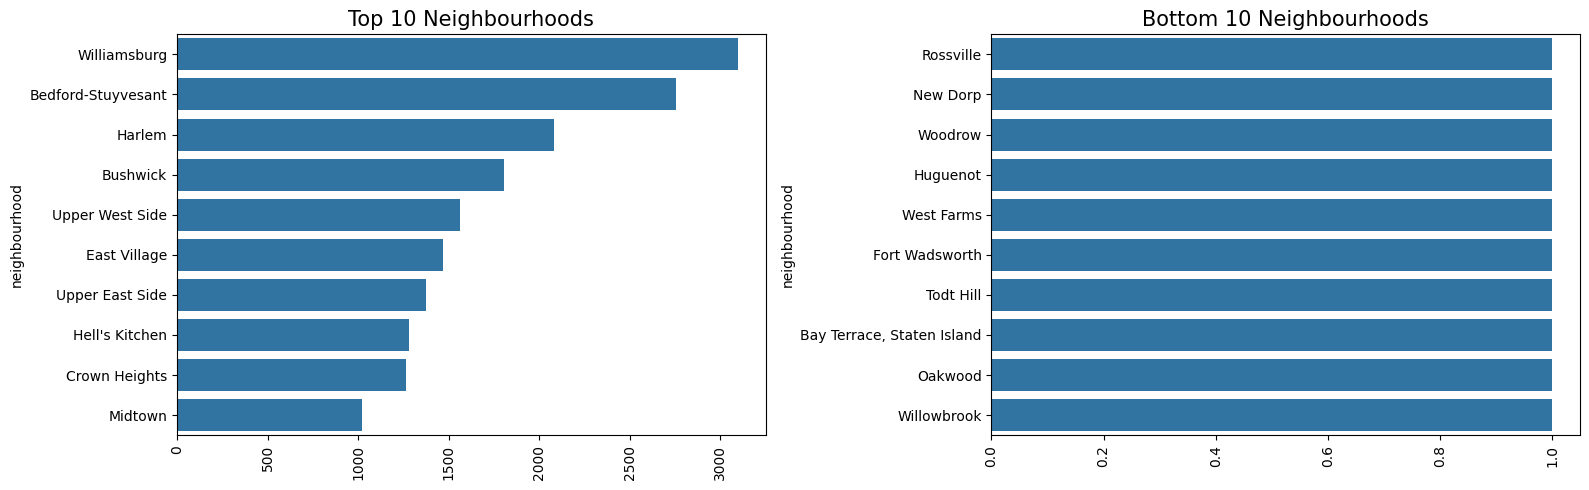

In [76]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
# Calculate value counts and store them in a separate variable
top_10 = df['neighbourhood'].value_counts().iloc[:10]
sns.barplot(x=top_10.values, y=top_10.index)
plt.title("Top 10 Neighbourhoods", fontsize=15)
plt.xticks(rotation=90) # Rotate x-axis labels for better readability

plt.subplot(1,2,2)
# Calculate value counts and store them in a separate variable
bottom_10 = df['neighbourhood'].value_counts().tail(10)
sns.barplot(x=bottom_10.values, y=bottom_10.index)
plt.title("Bottom 10 Neighbourhoods", fontsize=15)
plt.xticks(rotation=90) # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

Observation
Williamsburg and Bedford - Stuyvesant are the two highest Neighbourhood
willowbrook, Rossville, New Dorp, Richmondtown and woodrow are the least of the neighbourhood

**Conclusion**

This Airbnb ('AB NYC 2019') dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed us to dive deep into each significant column presented.

To begin, firstly, we identified the data of top ten host id and we figured out that top host ID has 327 listings.

Secondly, we take "Neighbourhood Group", and we found that Airbnb listings in New York City are concentrated in five neighborhoods: "Brooklyn" "Manhattan," "Queens," "Staten Island," and "Bronx". Moreover, we also learned from this chart that "Manhattan" and "Brooklyn" have the most hotel properties. Then, we found that Manhattan is the most expensive as the rental charges are more evenly distributed across all the price ranges, median price in Manhattan is approx $150 thats around double the median price of Bronx and the distributions in Queens and Staten Island appear to be very similar, while the Bronx appears to be the cheapest of the three.

Thirdly, we take the data of "room type" and figured out that it is devided into three subcategaries and we can observe that the Entire Home/Apartment has the

highest share, followed by the Private Room, and the least preferred is Shared Room. Futhermore, entire Home/Apartment is listed most near Manhattan,

while Private Rooms and Apartments Near Brooklyn are Nearly equal.

Fourthly, we put our latitude and longitude columns to good use by creating a geographical map of Newyork city which represents the location of all the areas with their latitude and longtitude. In other map is Color-coded for listing price of room as per the location.

In addition, we returned to the first column "name" and found out the words from the hotel names, as well as the count for the most frequently used words by hosts. Hosts prefer to use Private rooms, brooklyn,central park,modern,nyc and Beautiful these words in their listing to seek customer attention.

Finally, we looked for the listings with the "most reviews". Count the rating of top ten reviewed hotels, and found out The top 10 most reviewed listings on Airbnb for NYC have an average price of $65 per night, with the majority of them under 50, and 9/10 of them are "Private Room" types, with the top reviewed listing having 629 reviews